In [1]:
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from dmrgwaytorho import *
import qutip as q
from scipy import integrate,special
from scipy.linalg import eig,eigh,eigvals,eigvalsh
from scipy.sparse.linalg import eigs
import pickle 
from functions2 import doApplyHam,isingmodel,diagonalize_2,diagonalize
from functions import isingmodel_rev,isingmodel_rev_frac2


In [2]:
length=10
lambdarange=np.linspace(0.1,2)

In [3]:
dictionary_open0={}
dictionary_open1={}

for l in lambdarange:
    
    Energies,psis=diagonalize(2,length,isingmodel_rev_frac2(l,0.000),True)
    
    reshapedpsi0=psis[:,0].reshape(2**int((length-2)/2),4,2**int((length-2)/2)).transpose(1,0,2).reshape(4,-1)
    
    rhomagn0 = np.dot(reshapedpsi0, reshapedpsi0.conjugate().transpose())
    
    reshapedpsi1=psis[:,1].reshape(2**int((length-2)/2),4,2**int((length-2)/2)).transpose(1,0,2).reshape(4,-1)
    
    rhomagn1 = np.dot(reshapedpsi1, reshapedpsi1.conjugate().transpose())
    
    dictionary_open0[l]=rhomagn0
    
    dictionary_open1[l]=rhomagn1


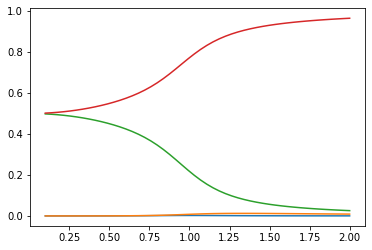

In [4]:
eigvec=[eigvalsh(dictionary_open0[l]) for l in lambdarange]
plt.plot(lambdarange,eigvec)
plt.show()

In [33]:
length=16

i=1
j=15
dict_open0_psis_2={}

startpsi=np.zeros(2**length)
startpsi[0]=1/np.sqrt(2)
#startpsi[-1]=1/np.sqrt(2)
for l in lambdarange:
    
    Energies,psis=diagonalize_2(1,length,isingmodel_rev_frac2(l,0.00),False,startpsi)
    
  #  Energies,psis=diagonalize(3,length,isingmodel_rev_frac2(l,0.00),False)
    

    #qpsi=q.Qobj(psis[:,0],dims=[[2]*length,[1]*length])
    #qpsi
    reshapedpsi0=psis[:,0].reshape([2]*length)
    
    reshapedpsi0=np.moveaxis(reshapedpsi0,i,0)
    
    reshapedpsi0=np.moveaxis(reshapedpsi0,j,1)
    
    reshapedpsi0=reshapedpsi0.reshape(4,-1)
    
    #rhomagn0 = qpsi.ptrace([i,j])
    rhomagn0=np.dot( reshapedpsi0,reshapedpsi0.conjugate().transpose())

    dict_open0_psis_2[l]=rhomagn0


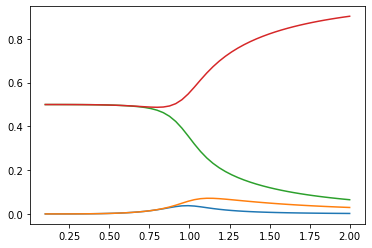

In [34]:
eigvec=[eigvalsh(dict_open0_psis_2[l]) for l in lambdarange]
plt.plot(lambdarange,eigvec)
plt.show()

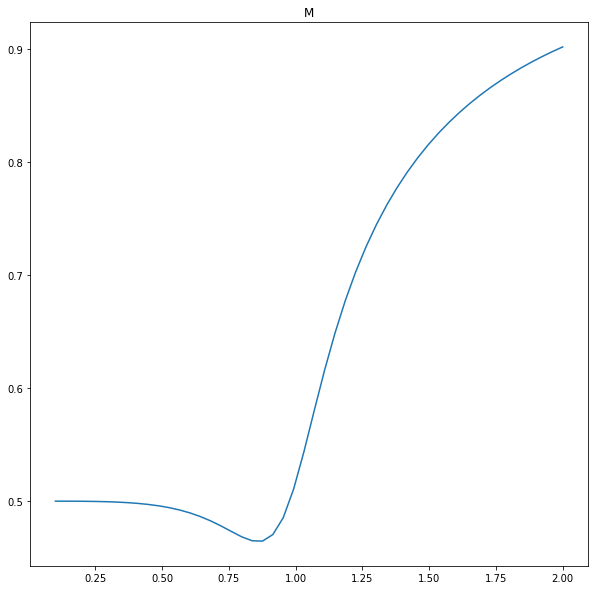

In [32]:
from functions2 import construct_distant_ham_2sites

fig, axs = plt.subplots(1,sharex=True,figsize=[10,10])


energies_pass=np.zeros_like(lambdarange)
energies_subs=np.zeros_like(lambdarange)
energies_antipass=np.zeros_like(lambdarange)

for j,l in enumerate(lambdarange):    

    qrho2=q.Qobj(dict_open0_psis_2[l],dims=[[2,2],[2,2]])

    eigval,eivecs=qrho2.eigenstates()

    reduced_H_matr=construct_distant_ham_2sites(2,l)

    h_eigval, h_eigvec= reduced_H_matr.eigenstates()

    rho_pass=q.Qobj()
    rho_anti=q.Qobj()

    sortdesc=np.sort(eigval)[::-1]

    for i in range(len(eigval)):    
        rho_pass+=sortdesc[i]*q.ket2dm(h_eigvec[i])

    for i in range(len(eigval)):    
        rho_anti+=eigval[i]*q.ket2dm(h_eigvec[i])

    ener_pass=q.expect(rho_pass,reduced_H_matr)-h_eigval[0]
    ener_subs=q.expect(qrho2,reduced_H_matr)-h_eigval[0]
    ener_anti=q.expect(rho_anti,reduced_H_matr)-h_eigval[0]

    energies_pass[j]=(ener_pass)/(2*abs(h_eigval[0]))
    energies_subs[j]=(ener_subs)/(2*abs(h_eigval[0]))
    energies_antipass[j]=(ener_anti)/(2*abs(h_eigval[0]))


axs.plot(lambdarange,(energies_antipass-energies_pass),label="L={}".format(L))
axs.set_title("M")


plt.show()   